In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [2]:
X, _ = make_moons(n_samples=200, noise=0.05, random_state=42)

This code creates a synthetic dataset using the make_moons function from scikit-learn. Here's a brief description of the dataset:

The make_moons function generates a binary classification dataset that resembles two interleaving half moons. In our case:

We create 200 samples (n_samples=200)
We add a small amount of Gaussian noise (noise=0.05) to make the dataset more realistic
We set random_state=42 for reproducibility
This dataset is particularly useful for demonstrating DBSCAN because:

It has a non-convex shape that many clustering algorithms (like K-means) would struggle with
The two clusters are clearly separated but have a complex shape
The added noise provides a more realistic scenario where some points might be classified as outliers

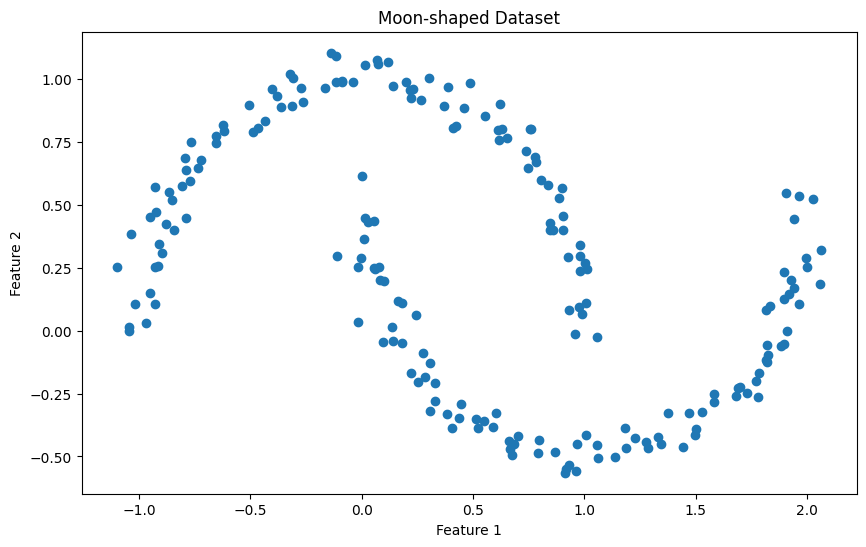

In [3]:
# Visualize the dataset
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1])
plt.title('Moon-shaped Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

This will show you the two interleaving half-moon shapes in our dataset as shown below

Determining the epsilon parameter
We use the k-distance graph method to help choose an appropriate epsilon value:

We define a function plot_k_distance_graph that calculates the distance to the k-th nearest neighbor for each point.
The distances are sorted and plotted.
We look for an "elbow" in the resulting graph to choose epsilon.

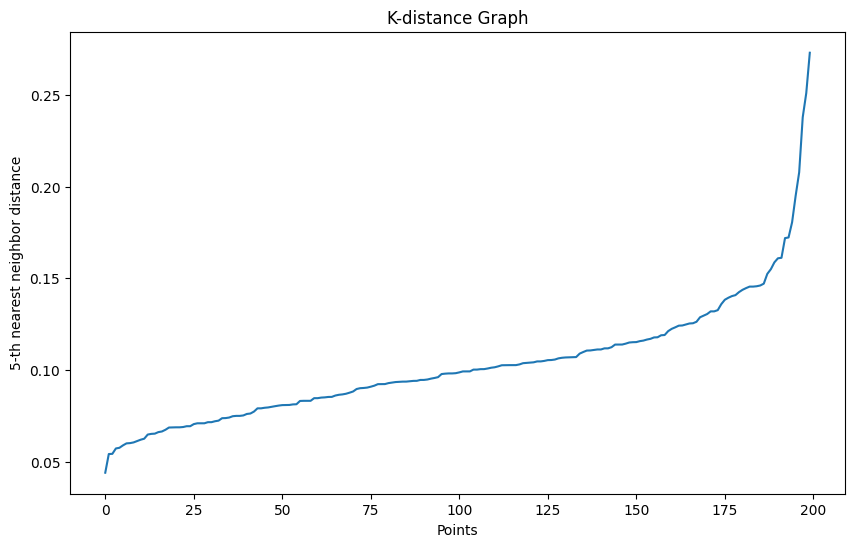

In [4]:
# Function to plot k-distance graph
def plot_k_distance_graph(X, k):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(X)
    distances, _ = neigh.kneighbors(X)
    distances = np.sort(distances[:, k-1])
    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.xlabel('Points')
    plt.ylabel(f'{k}-th nearest neighbor distance')
    plt.title('K-distance Graph')
    plt.show()
# Plot k-distance graph
plot_k_distance_graph(X, k=5)

In our example, based on the k-distance graph, we choose an epsilon of 0.15.

We use scikit-learn's DBSCAN implementation:

We set epsilon=0.15 based on our k-distance graph.
We set min_samples=5 (2 * num_features, as our data is 2D).
We fit the model to our data and predict the clusters.

In [5]:
# Perform DBSCAN clustering
epsilon = 0.15  # Chosen based on k-distance graph
min_samples = 5  # 2 * num_features (2D data)
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(X)


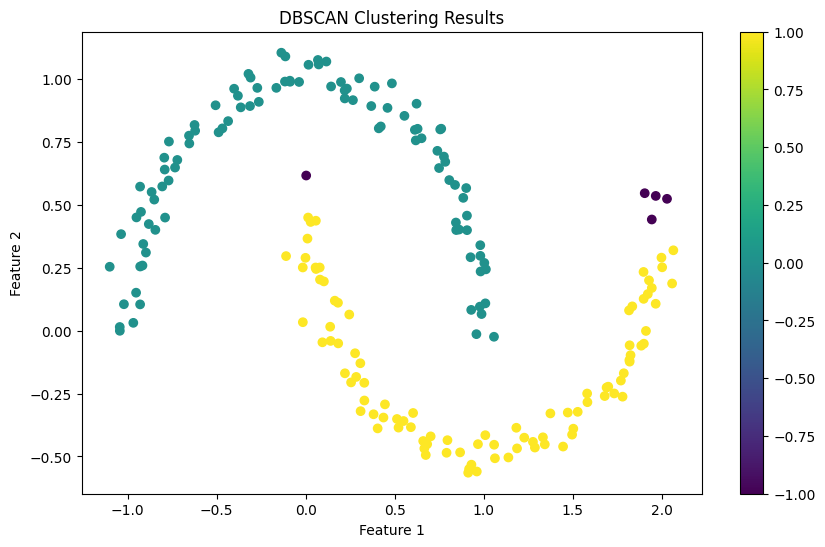

In [6]:
# Visualize the results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.colorbar(scatter)
plt.title('DBSCAN Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [7]:
# Print number of clusters and noise points
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)
print(f'Number of clusters: {n_clusters}')
print(f'Number of noise points: {n_noise}')

Number of clusters: 2
Number of noise points: 5


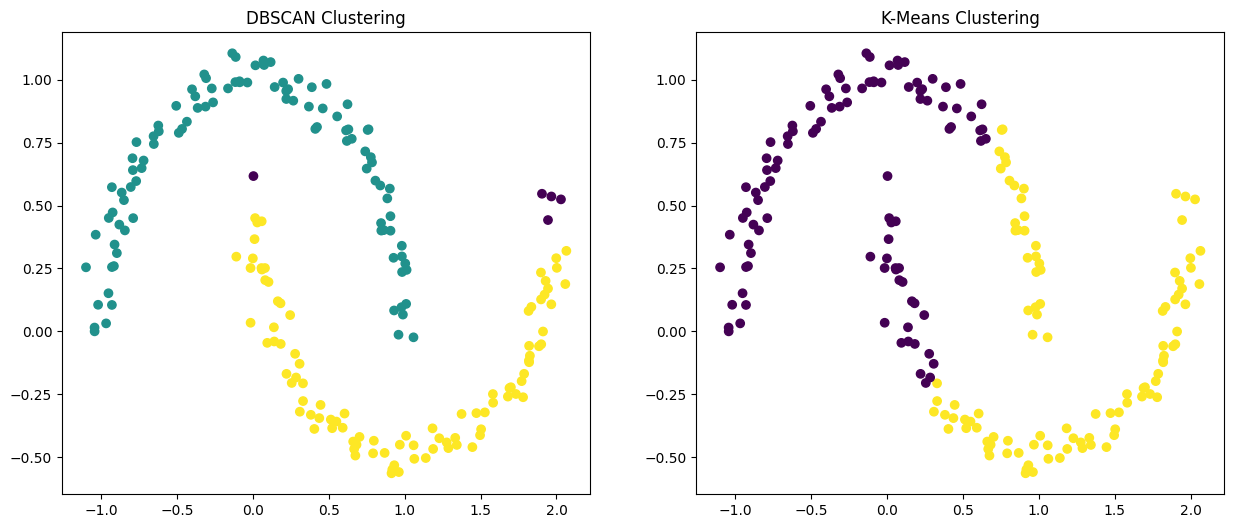

In [8]:
from sklearn.cluster import KMeans

# DBSCAN clustering
dbscan = DBSCAN(eps=0.15, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Visualize the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis')
ax1.set_title('DBSCAN Clustering')

ax2.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
ax2.set_title('K-Means Clustering')

plt.show()


You'll notice that

DBSCAN correctly identifies the two half-moon shapes as separate clusters.
K-Means struggles with the non-convex shape, often splitting one moon into two clusters or combining parts of both moons into one cluster.
DBSCAN may identify some points as noise (usually colored differently), while K-Means assigns every point to a cluster.